In [1]:
from src.database import DatabaseXRD,snip,Phase,MixPhase
from src.gaussnewton import GaussNewton
from numpy import newaxis,loadtxt,diag,histogram,arange,linspace,sin,concatenate,array,exp,pi,zeros,ones,prod,newaxis,arctan,savetxt,c_,fabs,sqrt,concatenate
from numpy.random import normal
from numpy.linalg import pinv,inv
from scipy.optimize import curve_fit,least_squares
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

from matplotlib.pyplot import plot,show,vlines,xlim,ylim,figure,semilogx,scatter,xlabel,ylabel,subplots,gca

from glob import glob

from scipy import signal
from numpy import fft,pad,concatenate,stack

from src.spectra import Spectra

In [2]:
database = DatabaseXRD().read_cifs('Database/')

calcite = database['Calcite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][2]
spinel = database['Spinel'][0]
barite = database['Barite'][0]

In [3]:
def fce_calibration(x,a,beta,s):
    return (arctan((x+a)/s)) * 180 / pi + beta

In [4]:
files = glob('Cappello/Hydrocerussite/roi*.dat')

xrd_gn = []
xrd_spectra = []

for file in files:
    
    spectra = Spectra(file)
    spectra.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).raw_snip(m=16)#.convolve(1).snip()
    #spectra.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).snip()
    
    xrd_spectra += [spectra]
    xrd_gn += [GaussNewton(hydrocerussite,spectra)]

(0.0, 1.0)

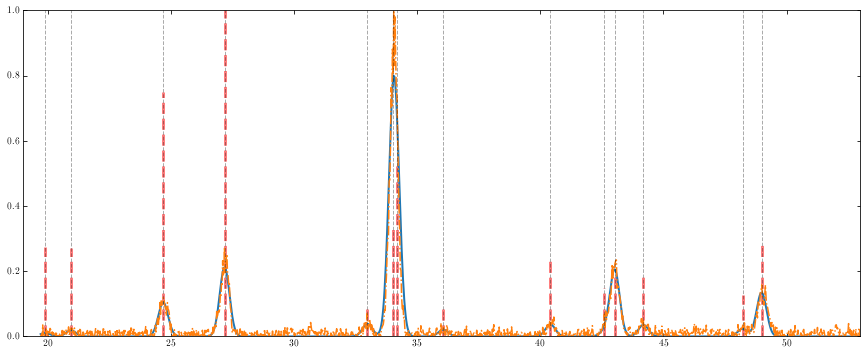

In [5]:
g = xrd_gn[0]
s = xrd_spectra[0]

for _ in range(64):
    g.calibration(alpha=1)

figure(figsize=(15,6))

vlines(g.mu,0,g.i,'r',alpha=0.5,ls='--',lw=3)
plot(g.theta,g.z,'-',lw=2)
plot(s.theta,s.intensity,'-.')
vlines(g.mu,0,1,'k',alpha=0.33,ls='--',lw=1)


xlim(19,53)
ylim(0,1)

[-1215.91245051    51.66346478  1948.60571446] [9.74302857]
[-1211.93878296    51.66346478  1941.62569719] [9.70812849]
[-1216.45515556    51.66346478  1948.51762991] [9.74258815]
[-1213.34749422    51.66346478  1946.39473985] [9.7319737]
[-1216.33070272    51.66346478  1947.78144837] [9.73890724]
[-1212.50593072    51.66346478  1943.78505682] [9.71892528]
[-1211.97252364    51.66346478  1941.05336928] [9.70526685]
[-1216.86073861    51.66346478  1949.91186773] [9.74955934]
[-1215.96004839    51.66346478  1946.33442241] [9.73167211]


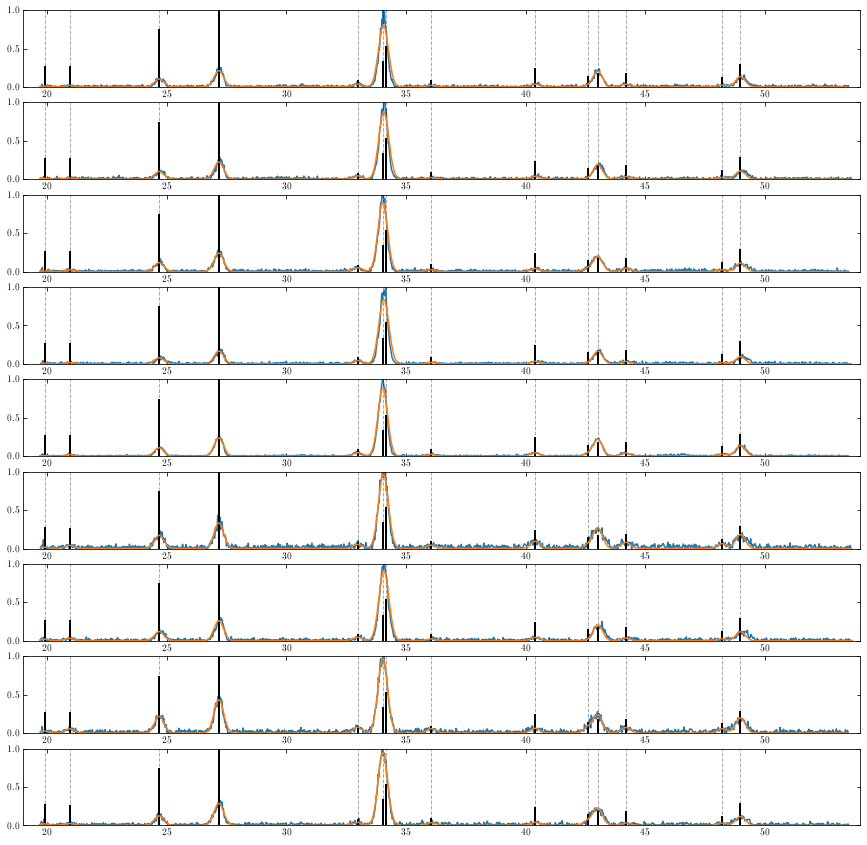

In [9]:
%matplotlib inline
fig,ax = subplots(len(xrd_spectra),1,figsize = (15,15))

for i,(spectra,gn) in enumerate(zip(xrd_spectra,xrd_gn)):
    
    for _ in range(16):
        gn.calibration(alpha=1)
    print(gn.spectra.opt,gn.spectra.s * 5e-3)
    
    ax[i].plot(spectra.theta,spectra.intensity)
    
    x,y = hydrocerussite.get_theta(max_theta = 53,min_intensity=0.05)
    ax[i].vlines(x,0,y,'k',lw=2)
    ax[i].vlines(x,0,1.0,'k',lw=1,ls='--',alpha=0.33)
        
    ax[i].plot(gn.theta,gn.z)
    
    ax[i].set_xlim(19,54)
    ax[i].set_ylim(0,1)

[-1215.91245051    51.66346478  1948.60571446] [-1214.71937795    51.66346478  1952.71389334] 9.743028572282316
[-1211.93878296    51.66346478  1941.62569719] [-1214.71937795    51.66346478  1952.71389334] 9.708128485942346
[-1216.45515556    51.66346478  1948.51762991] [-1214.71937795    51.66346478  1952.71389334] 9.742588149554342
[-1213.34749422    51.66346478  1946.39473985] [-1214.71937795    51.66346478  1952.71389334] 9.731973699228897
[-1216.33070272    51.66346478  1947.78144837] [-1214.71937795    51.66346478  1952.71389334] 9.738907241854033
[-1212.50593072    51.66346478  1943.78505682] [-1214.71937795    51.66346478  1952.71389334] 9.718925284112423
[-1211.97252364    51.66346478  1941.05336928] [-1214.71937795    51.66346478  1952.71389334] 9.705266846389323
[-1216.86073861    51.66346478  1949.91186773] [-1214.71937795    51.66346478  1952.71389334] 9.749559338667682
[-1215.96004839    51.66346478  1946.33442241] [-1214.71937795    51.66346478  1952.71389334] 9.73167211

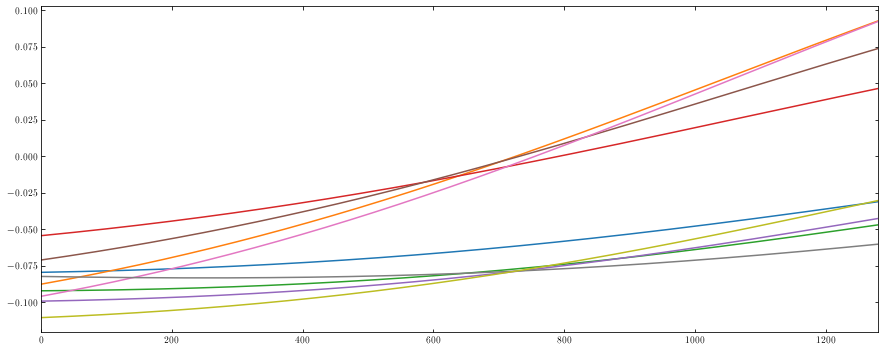

In [10]:
#fig,ax = subplots(len(xrd_spectra),1,figsize = (15,15))
figure(figsize=(15,6))

x = arange(0,1280)
for i,gn in enumerate(xrd_gn):
    opt = gn.spectra.opt
    opt_file = gn.spectra.opt_file
    print(opt,opt_file,opt[2]*5e-3)
    
    y_new = fce_calibration(x,*opt)
    y_old = fce_calibration(x,*opt_file)
    
    plot(y_new-y_old)
    xlim(0,1280)
